In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import traceback

# Q1: Display and count only the full circles

In [ ]:
###########################################################
path = r'C:\Users\Abdullah\Desktop\python files\aip\bonus assign1\data\1.jpg'
img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# img1 = cv2.bitwise_not(img1)
thresh1, bw1 =  cv2.threshold(img1,180,255, cv2.THRESH_BINARY)
# print(np.unique(img1))
# print(np.unique(bw1))
bw1 = cv2.bitwise_not(bw1)
# plt.imshow(bw1,cmap='gray')
contours, hierarchy = cv2.findContours(bw1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

256

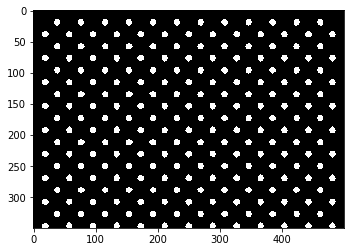

In [ ]:
zero=np.zeros(img1.shape)

# for x in range(len(contours)):
#         plt.imshow(cv2.drawContours(zero, contours, x, (255,0,0), 5),cmap='gray')

# for x in contours:
#     print(cv2.arcLength(x,True))

# for x in contours:
#     print(cv2.contourArea(x))



full=[]
for x in range(len(contours)):
    if((cv2.contourArea(contours[x]))>8):
        full.append(x)
for x in full:
        plt.imshow(cv2.drawContours(zero, contours, x, (255,0,0), 5),cmap='gray')

# count of full circles

In [ ]:
print("Total number of complete circles = ",len(full))

Total number of complete circles =  225


# Display and count the half circles

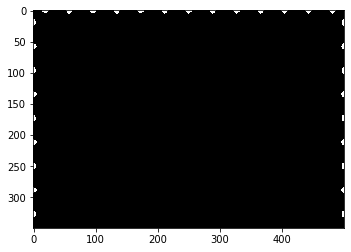

In [ ]:
zero=np.zeros(img1.shape)
small=[]
for x in range(len(contours)):
    if((cv2.contourArea(contours[x]))<9):
        small.append(x)

for x in small:
        plt.imshow(cv2.drawContours(zero, contours, x, (255,0,0), 5),cmap='gray')

# count of half circles

In [ ]:
print("Total number of half circles = ",len(small))

Total number of half circles =  31


# correct

## Q2

reading image as grayscale, blurring it, converting to black and white

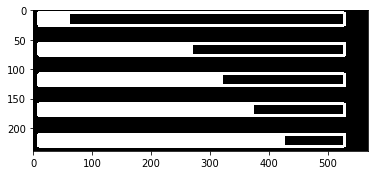

In [ ]:
path = r'C:\Users\Abdullah\Desktop\python files\aip\bonus assign1\data\2.jpg'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (5,5),0)
plt.imshow(img,cmap="gray")
img = cv2.bitwise_not(img)
# plt.imshow(img1,cmap='gray')
thresh, bw =  cv2.threshold(img,10,240, cv2.THRESH_BINARY)
plt.imshow(bw,cmap='gray')

finding contours and their area

In [ ]:
contours, hierarchy = cv2.findContours(bw,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
z=[]
area=[]
for x in range(len(contours)):
    print(cv2.contourArea(contours[x]))
    z.append(x)
    area.append(cv2.contourArea(contours[x]))

13086.0
1698.0
13085.0
2582.0
13086.0
3483.0
12561.0
4110.0
13087.0
7903.0


finding the percentage of bars filled using the areas of contours

In [ ]:
print((((area[0]-area[1])/area[0])*100)," 5th Bar")
print((((area[2]-area[3])/area[2])*100)," 4rth bar")
print((((area[4]-area[5])/area[4])*100)," 3rd bar")
print((((area[6]-area[7])/area[6])*100)," 2nd bar")
print((((area[8]-area[9])/area[8])*100)," 1st bar")
# assigning values as intgers
bar5=int((((area[0]-area[1])/area[0])*100))
bar4=int((((area[2]-area[3])/area[2])*100))
bar3=int((((area[4]-area[5])/area[4])*100))
bar2=int((((area[6]-area[7])/area[6])*100))
bar1=int((((area[8]-area[9])/area[8])*100))

87.02430077945897  5th Bar
80.26748184944593  4rth bar
73.38376891334251  3rd bar
67.27967518509674  2nd bar
39.61182853213112  1st bar


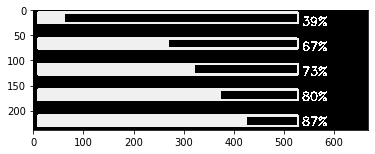

In [ ]:
#resizing image to get a wider image
row=bw.shape[0]
col=bw.shape[1]
new=np.zeros((row,col+100))
new[0:row,0:col]=bw
#making copy
imgcp=new.copy()

#font style
font = cv2.FONT_HERSHEY_SIMPLEX


# fontScale
fontScale = 0.8

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 2 px
thickness = 2

# Using cv2.putText() method
imgcp = cv2.putText(new, str(bar1)+'%', (537,30), font, fontScale, color, thickness, cv2.LINE_AA)
imgcp = cv2.putText(new, str(bar2)+'%', (537,80), font, fontScale, color, thickness, cv2.LINE_AA)
imgcp = cv2.putText(new, str(bar3)+'%', (537,130), font, fontScale, color, thickness, cv2.LINE_AA)
imgcp = cv2.putText(new, str(bar4)+'%', (537,180), font, fontScale, color, thickness, cv2.LINE_AA)
imgcp = cv2.putText(new, str(bar5)+'%', (537,230), font, fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(new,cmap='gray')

# Q3

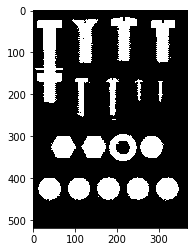

In [ ]:
path3 = r'C:\Users\Abdullah\Desktop\python files\aip\bonus assign1\data\3.jpg'
img3 = cv2.imread(path3,cv2.IMREAD_GRAYSCALE)
plt.imshow(img3,cmap='gray')
img3 = cv2.bitwise_not(img3)
thresh3, bw3 =  cv2.threshold(img3,10,240, cv2.THRESH_BINARY)
plt.imshow(bw3,cmap='gray')

FInding contours in the images

In [ ]:
contours, hierarchy = cv2.findContours(bw3,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
len(contours)

176

filtering objects that are other than noise using perimeters of contours

In [ ]:
objects=[]
for z in range(len(contours)):
    perimeter = cv2.arcLength(contours[z],True)
    if (perimeter>20):
        objects.append(z)

# Display only screws

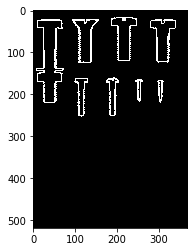

In [ ]:
imgnew=np.zeros(img3.shape) #empty
plt.imshow(cv2.drawContours(imgnew, contours, objects[15], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[16], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[17], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[14], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[13], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[12], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[11], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[10], (255,0,0),2),cmap='gray')

# Display only objects with holes

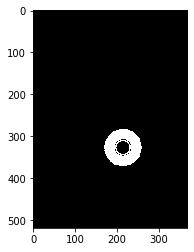

In [ ]:
imgnew=np.zeros(img3.shape)
plt.imshow(cv2.drawContours(imgnew, contours, objects[9], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(imgnew, contours, objects[8], (255,0,0),24),cmap='gray')

# Display only Nuts

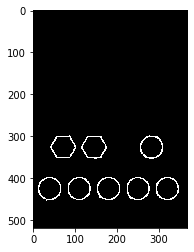

In [ ]:
imgnew=np.zeros(img3.shape)
for x in range(8):
    plt.imshow(cv2.drawContours(imgnew, contours, objects[x], (255,0,0),2),cmap='gray')
# plt.imshow(cv2.drawContours(imgnew, contours, objects[8], (255,0,0),24),cmap='gray')

# Q4

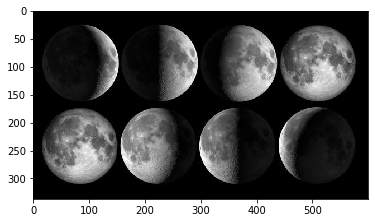

In [ ]:
path4 = r'C:\Users\Abdullah\Desktop\python files\aip\bonus assign1\data\4.jpg'
img4 = cv2.imread(path4,cv2.IMREAD_GRAYSCALE)
plt.imshow(img4,cmap='gray')

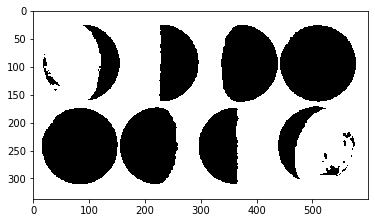

In [ ]:
path4 = r'C:\Users\Abdullah\Desktop\python files\aip\bonus assign1\data\4.jpg'
img4 = cv2.imread(path4,cv2.IMREAD_GRAYSCALE)
img4 = cv2.GaussianBlur(img4, (5,5),0)
# plt.imshow(img4,cmap="gray")
img4 = cv2.bitwise_not(img4)
# plt.imshow(img4,cmap='gray')
thresh, bw4 =  cv2.threshold(img4,230,240, cv2.THRESH_BINARY)
plt.imshow(bw4,cmap='gray')

finding contours in image

In [ ]:
contours, hierarchy = cv2.findContours(bw4,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

filtering noise base on the area of the contours

In [ ]:
#area of phase
objects=[]
num=0
indexes=[]
areas=[]
for z in range(len(contours)):
    if (cv2.contourArea(contours[z])>500 and cv2.contourArea(contours[z])<20000):
        print(cv2.contourArea(contours[z]))
        objects.append(z)
        indexes.append(num)
        areas.append(cv2.contourArea(contours[z]))
    num+=1

14696.5
7656.0
11296.5
3962.5
14707.0
11253.0
7630.0
4005.5


drawing the countours for the objects in moon

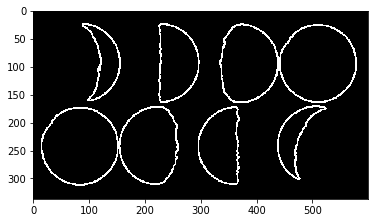

In [ ]:
imgn4=np.zeros(img4.shape)
for x in range(len(objects)):
    plt.imshow(cv2.drawContours(imgn4, contours, objects[x], (255,0,0),2),cmap='gray')

selecting countours for full, half, cresent and quater moon based on their area

In [ ]:
full=[]
half=[]
quater=[]
cresent=[]
for x in range(len(areas)):
    if (areas[x]>14600 and areas[x]<14800):
        full.append(x)
    elif (areas[x]>7600 and areas[x]<7700):
        half.append(x)
    elif (areas[x]>11200 and areas[x]<11300):
        quater.append(x)
    elif (areas[x]>3900 and areas[x]<4100):
        cresent.append(x)

full moon

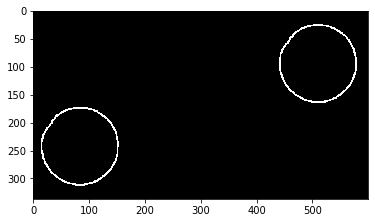

In [ ]:
img4full=np.zeros(bw4.shape)
plt.imshow(cv2.drawContours(img4full, contours, indexes[full[0]], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(img4full, contours, indexes[full[1]], (255,0,0),2),cmap='gray')

half moon

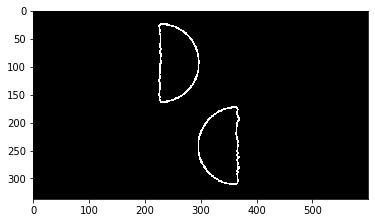

In [ ]:
img4hlf=np.zeros(bw4.shape)
plt.imshow(cv2.drawContours(img4hlf, contours, indexes[half[0]], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(img4hlf, contours, indexes[half[1]], (255,0,0),2),cmap='gray')

quater moon

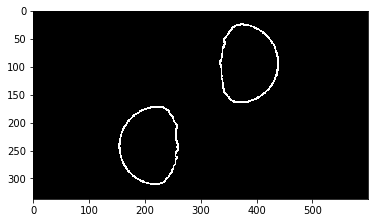

In [ ]:
img4qtr=np.zeros(bw4.shape)
plt.imshow(cv2.drawContours(img4qtr, contours, indexes[quater[0]], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(img4qtr, contours, indexes[quater[1]], (255,0,0),2),cmap='gray')

cresent moon

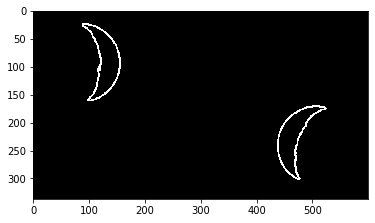

In [ ]:
img4cst=np.zeros(bw4.shape)
plt.imshow(cv2.drawContours(img4cst, contours, indexes[cresent[0]], (255,0,0),2),cmap='gray')
plt.imshow(cv2.drawContours(img4cst, contours, indexes[cresent[1]], (255,0,0),2),cmap='gray')